<a href="https://colab.research.google.com/github/shyammohanazad/DataScienceProjects/blob/Insurance_Cost_Prediction_Project_Python/Insurance_Pred_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install pymongo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Step 1 : Pulling Data from Database and storing in our local system.

In [ ]:
import pymongo
import pandas as pd

# connection to MongoDB


In [ ]:
client=pymongo.MongoClient("")
client.list_database_names()

db=client["Insurance_Prediction"]
print(db.list_collection_names())

collection=db['DsProject1']

query={}
cursor=collection.find(query)
df=pd.DataFrame(list(cursor))
df.to_csv('Ins_Prediction.csv', index=False)

dataframe=pd.read_csv('Ins_Prediction.csv')
dataframe.head()

['DsProject1']


,_id,age,sex,bmi,children,smoker,region,expenses
0,6414b3f22538ff3b15287c7a,19,female,27.9,0,yes,southwest,16884.92
1,6414b3f22538ff3b15287c7b,18,male,33.8,1,no,southeast,1725.55
2,6414b3f22538ff3b15287c7c,28,male,33.0,3,no,southeast,4449.46
3,6414b3f22538ff3b15287c7d,33,male,22.7,0,no,northwest,21984.47
4,6414b3f22538ff3b15287c7e,32,male,28.9,0,no,northwest,3866.86


# Droping _id column as it is not required

In [ ]:
dataframe.drop(columns=['_id'], inplace=True)

dataframe.head()

dataframe.shape

dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [ ]:
# EDA : Exploratory Data Analysis

for feature in dataframe.columns:
    if dataframe[feature].dtypes != 'object':
        print(feature)

dataframe.info()

age
bmi
children
expenses
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# filtering out all the numerical values.
numerical_feature=[feature for feature in dataframe.columns if dataframe[feature].dtype !='object']
print(f"{numerical_feature}")

['age', 'bmi', 'children', 'expenses']


In [ ]:
# filtering out all the categorical values. 'o' --> object
categorical_feature=[feature for feature in dataframe.columns if dataframe[feature].dtype =='object']
print(f"{categorical_feature}")

['sex', 'smoker', 'region']


In [ ]:
# Proportion of count-data on categrical features

for col in categorical_feature:
    print(dataframe[col].value_counts(normalize=True)*100)
    print('-*-*'*50)

male      50.523169
female    49.476831
Name: sex, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
no     79.521674
yes    20.478326
Name: smoker, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
southeast    27.204783
southwest    24.289985
northwest    24.289985
northeast    24.215247
Name: region, dtype: float64
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


## Univariate **Analysis**

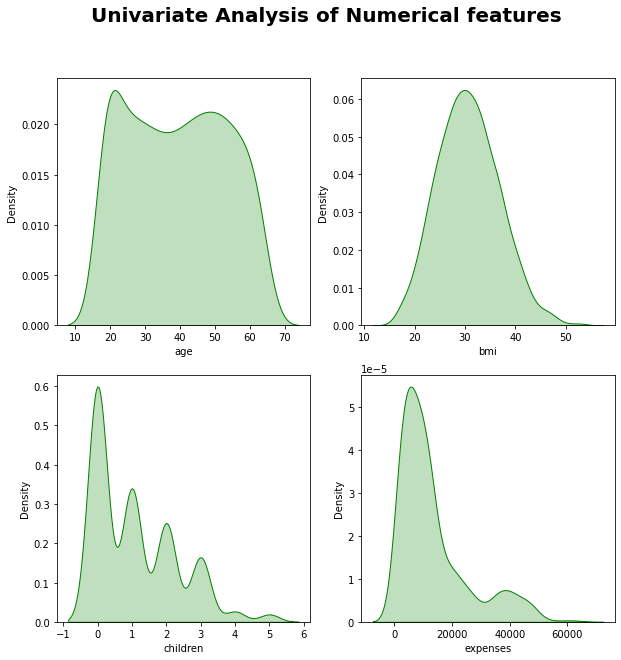

In [ ]:
### For Numerical features

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.suptitle("Univariate Analysis of Numerical features", fontsize=20, fontweight='bold')

for i in range(0, len(numerical_feature)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=dataframe[numerical_feature[i]], fill=True , color='g' )
    plt.xlabel(numerical_feature[i])
    plt.tight_layout

In [ ]:

    # for saving the image
plt.savefig('UnivariateAnalysisImg.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

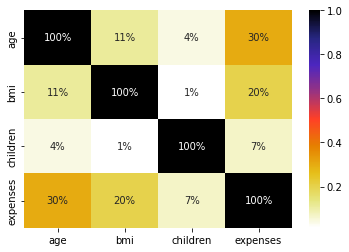

In [ ]:
## Checking Multicolinearity in numerical Features

dataframe[list(dataframe.columns)[1:]].corr(numeric_only=True)

# heatmap shows thecorrelaton between the variables (one to one basis) , annot: to show valuesin boxes, 
# fmt: to represent values of correlation that comes in decimal by default

sns.heatmap(dataframe.corr(numeric_only=True), cmap="CMRmap_r" , annot=True, fmt='.0%')

# if we find multicolinearity or correlation then we use techniques such Dimensionality reduction, PCA analysis etc to reduce variables.

0---->age


<ipython-input-16-85501245090f>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, bins=20, kde=True, x=col, multiple='stack', ax=ax[i,1],palette=clr1)


1---->bmi


<ipython-input-16-85501245090f>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, bins=20, kde=True, x=col, multiple='stack', ax=ax[i,1],palette=clr1)


2---->children


<ipython-input-16-85501245090f>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe, bins=20, kde=True, x=col, multiple='stack', ax=ax[i,1],palette=clr1)


3---->expenses


IndexError: ignored

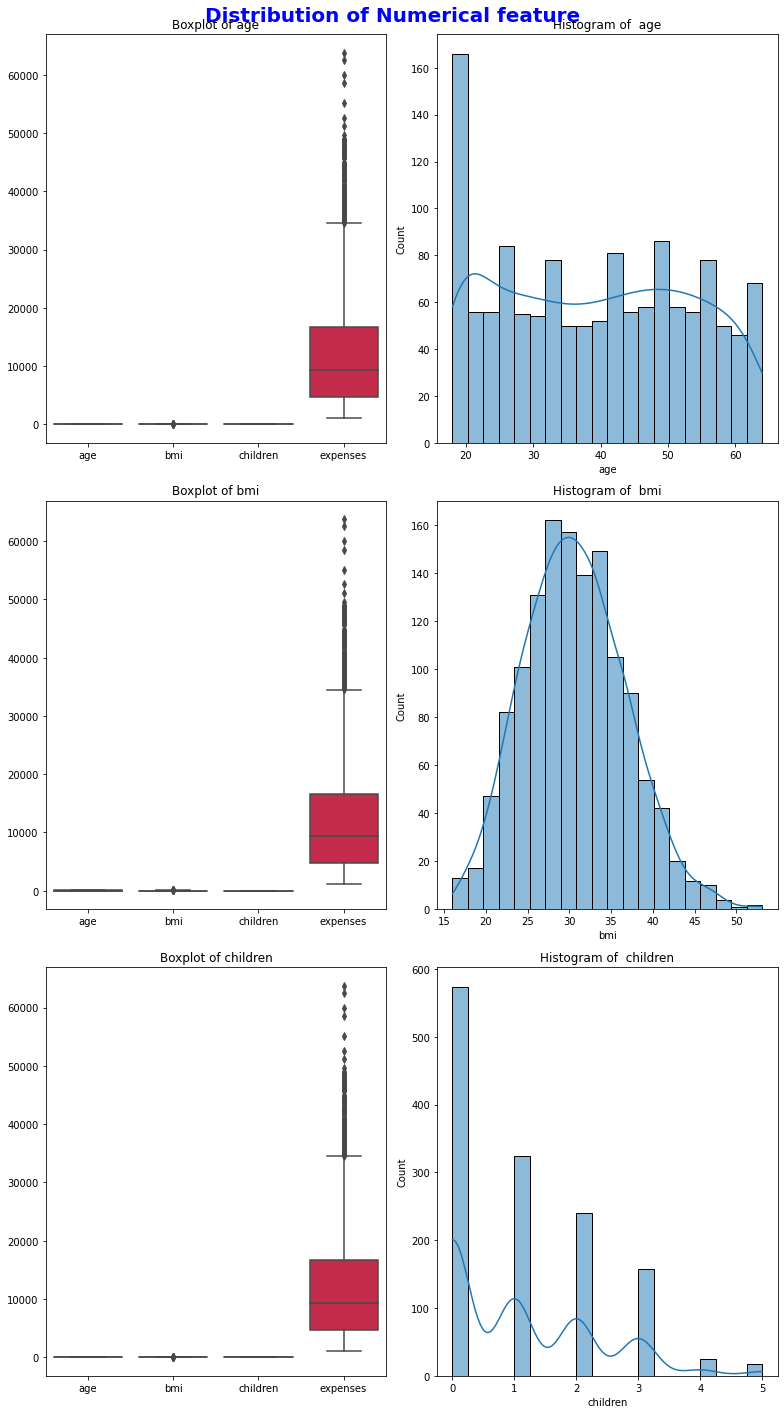

In [ ]:
## Outlier and Histplots

clr1=['#1e90ff','#dc143c']
fig, ax=plt.subplots(3,2, figsize=(11,20))
fig.suptitle("Distribution of Numerical feature", color='blue', fontsize=20, fontweight='bold')

for i, col in enumerate(numerical_feature):
    print(f"{i}---->{col}")
    sns.boxplot(data=dataframe,palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}' , fontsize=12)
    sns.histplot(data=dataframe, bins=20, kde=True, x=col, multiple='stack', ax=ax[i,1],palette=clr1)
    ax[i,1].set_title(f'Histogram of  {col}', fontsize=12)
    fig.tight_layout()
# if we do not give enumerate value  here then output will be only name of columns, but enumerate function has given 'Index'  to the column values.

### {There are some libraries like 'PandasProfiling' , 'D-Tale' , 'Swig-viz' etc to perform EDA automatically.

In [ ]:
! pip install dtale

import dtale

d=dtale.show(dataframe)
d.open_browser()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 70.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 KB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 KB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 88.5 MB/s eta 0:00:00
     ━━━━━━━━━

## Feature **Engineering**

In [ ]:

### Checking Duplicates

dataframe.duplicated().sum()

1

In [ ]:
### Variation Inflation factor (VIF)

dataframe.drop_duplicates(inplace=True)

dataframe.duplicated().sum()

0

In [ ]:
dataframe.shape


(1337, 7)

In [ ]:
dataframe.shape[1]

7

In [ ]:
dataframe.shape[0]

1337

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc (features,df):
    X=df[features]
    # The calculation of variance inflation requiresa constant
    X['Intersect']=1
    
    # Create a dataframe to store the VIF values
    vif=pd.DataFrame()
    vif['variable']=X.columns
    vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif=vif[vif['variable']!='Intercept']
    return vif

In [ ]:
## This code is to filter the warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Calculation of VIF also a method to find out MUlticolinearity
vif_calc(numerical_feature, dataframe)

## Outlier Treatment and Capping It

# the data is so small we cannot delete the data , it will become more less. 
# so instead of deleting the rows we will replace them lower_bound or Upper_Bound

def detect_outliers(col):
    #Finding the IQR
    percentile75=int(dataframe[col].quantile(0.75))
#     percentile50=df[col].quantile(0.50)
    percentile25=int(dataframe[col].quantile(0.25))
    print('\n ####' , col, "###")
    print('percentile25=',percentile25)
    print('percentile75=',percentile75)
    iqr=percentile75-percentile25
    
    ## Finding the lower_limit and Upper_limit
    upper_limitQ3=percentile75 + 1.5*iqr
    lower_limitQ1=percentile25 - 1.5*iqr
    print('upper_limit', upper_limitQ3)
    print('lower_limit', lower_limitQ1)
    
    #Replacing the oulier values
    dataframe.loc[(dataframe[col]>upper_limitQ3),col]=upper_limitQ3
    dataframe.loc[(dataframe[col]<lower_limitQ1),col]=lower_limitQ1
    return dataframe

In [ ]:
for col in numerical_feature:
    detect_outliers(col)


 #### age ###
percentile25= 27
percentile75= 51
upper_limit 87.0
lower_limit -9.0

 #### bmi ###
percentile25= 26
percentile75= 34
upper_limit 46.0
lower_limit 14.0

 #### children ###
percentile25= 0
percentile75= 2
upper_limit 5.0
lower_limit -3.0

 #### expenses ###
percentile25= 4746
percentile75= 16657
upper_limit 34523.5
lower_limit -13120.5


In [ ]:
dataframe.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.640987,1.095737,12491.027240
std,14.044333,6.029971,1.205571,10165.223754
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,46.000000,5.000000,34523.500000


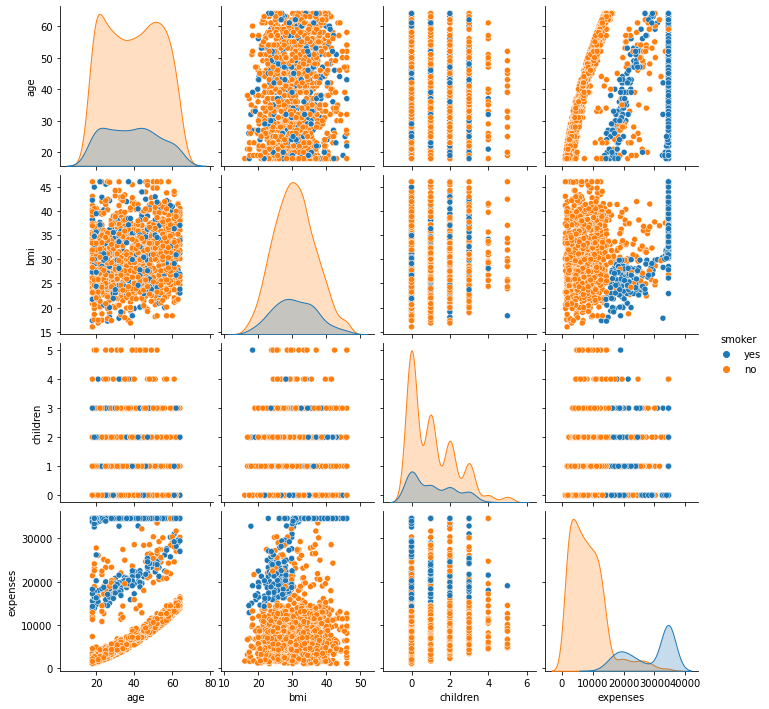

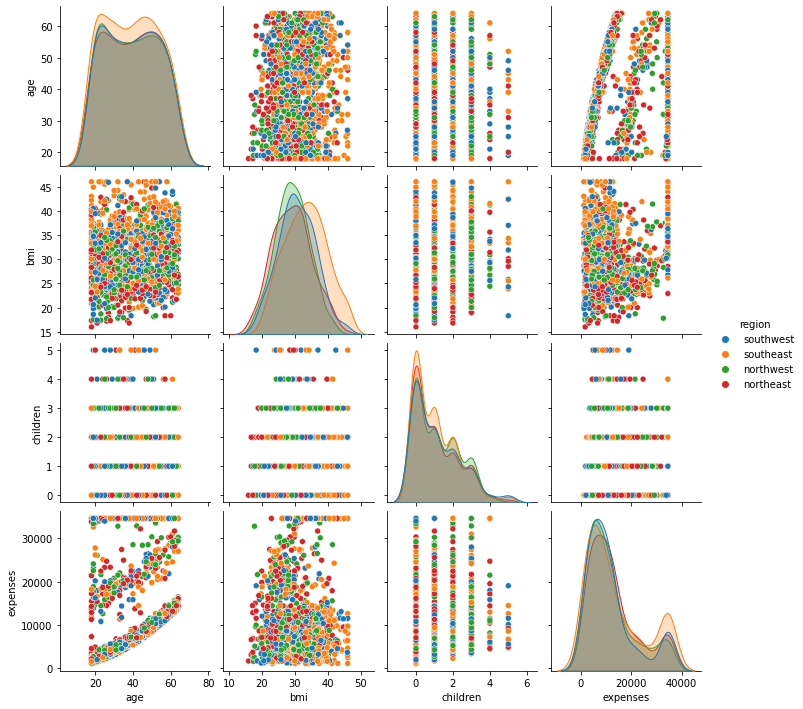

In [ ]:
import seaborn as sns
sns.pairplot(data=dataframe, hue='smoker')
# Diagonal values are univariate analysis of independent variable.

sns.pairplot(data=dataframe, hue='region')

# Diagonal values are univariate analysis of independent variable.

In [ ]:
### SPlit X and Y

from sklearn.model_selection import  train_test_split
ind_varX=dataframe.drop(['expenses'], axis=1)
tar_varY=dataframe['expenses']

In [ ]:
# Since some of our data is not normaly distributed,so we are Creating aColumn Transformer

num_feature=ind_varX.select_dtypes(exclude='object').columns
cat_feature=ind_varX.select_dtypes(include='object').columns

num_feature

cat_feature

# As taking capability of both "OneHotEncoding and StandardScaler" on entire datasetin one go, this Preprocessor will act as an object.
# So whenever it encounter new data with same variable then and passed through this preprocessor , it wll automatically OHE and SS on it. 

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder()

preprocessor = ColumnTransformer(
[
    # Column transformers take THree var generally ['name', function to perform, feature(data for which we r applying)]
    ('OneHotEncoding', cat_transformer,cat_feature),
    ('StandardScaling', num_transformer, num_feature)
]
)

ind_varX=preprocessor.fit_transform(ind_varX)
ind_varX

array([[ 1.        ,  0.        ,  0.        , ..., -1.44041773,
        -0.4547307 , -0.90923416],
       [ 0.        ,  1.        ,  1.        , ..., -1.51164747,
         0.52408126, -0.07944162],
       [ 0.        ,  1.        ,  1.        , ..., -0.79935006,
         0.39136099,  1.58014347],
       ...,
       [ 1.        ,  0.        ,  1.        , ..., -1.51164747,
         1.03837229, -0.90923416],
       [ 1.        ,  0.        ,  1.        , ..., -1.29795825,
        -0.8031214 , -0.90923416],
       [ 1.        ,  0.        ,  0.        , ...,  1.55123139,
        -0.2556503 , -0.90923416]])

In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import catboost as cb
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
models ={
    "Linear Regression" :LinearRegression(),
    "Lasso":  Lasso(),
    "Ridge": Ridge(),
    " K Neighbors Regression": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

Creating a Function to Evaaluate the **Model**

In [ ]:
import numpy as np
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    
    return mae, mse, r2_square

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(ind_varX,tar_varY,test_size=0.2, random_state=41)
X_train.shape, X_test.shape

((1069, 11), (268, 11))

In [ ]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
KNeighborsRegressor()
DecisionTreeRegressor()
RandomForestRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
AdaBoostRegressor()


In [ ]:
model_list = []
r2 =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
   # models.values is the values of model dictionary created above
    model.fit(X_train, Y_train)  ## Training the Model
    
    # Making Predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    ## Evaluting the Model or Predictions
    model_train_mae, model_train_mse, model_train_r2=evaluate_model(Y_train,Y_train_pred)
    model_test_mae, model_test_mse, model_test_r2=evaluate_model(Y_test,Y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for  training Dtaaset')
    print(f"Mean absolute error = {model_train_mae}")
    print(f"Mean squared error = {model_train_mse}")
    print(f" R2 Score = {model_train_r2}")

    print("--------------------------------------------------------")
     
    print('Model performance for  testing Dtaaset')
    print(f"Mean absolute error = {model_test_mae}")
    print(f"Mean squared error = {model_test_mse}")
    print(f" R2 Score = {model_test_r2}")
          
    print("####################################")
    r2.append(model_test_r2)
    print("         ")
    print("         ")

Linear Regression
Model performance for  training Dtaaset
Mean absolute error = 3444.124686623012
Mean squared error = 26654785.613320958
 R2 Score = 0.7515041023362196
--------------------------------------------------------
Model performance for  testing Dtaaset
Mean absolute error = 3278.7164552238805
Mean squared error = 23691206.51392052
 R2 Score = 0.724843033457454
####################################
         
         
Lasso
Model performance for  training Dtaaset
Mean absolute error = 3420.727602861177
Mean squared error = 26659874.162443947
 R2 Score = 0.7514566630658212
--------------------------------------------------------
Model performance for  testing Dtaaset
Mean absolute error = 3258.2632795642253
Mean squared error = 23717940.55460093
 R2 Score = 0.7245325360780688
####################################
         
         
Ridge
Model performance for  training Dtaaset
Mean absolute error = 3425.401083097776
Mean squared error = 26660391.95959703
 R2 Score = 0.75145183

In [ ]:
pd.DataFrame(list(zip(model_list,r2)),columns=['model_name','r2_score']).sort_values(by=['r2_score'],ascending=False)

,model_name,r2_score
7,CatBoost Regressor,0.792879
5,Random Forest Regressor,0.766460
8,AdaBoost Regressor,0.739149
3,K Neighbors Regression,0.727911
0,Linear Regression,0.724843
2,Ridge,0.724594
1,Lasso,0.724533
6,XGB Regressor,0.720961
4,Decision Tree,0.587762


**Performing Hyperparameters for top 3 RF, AdaBoost, Catboost**